# Ames Housing Data

#### Imports

In [1]:
import os
import math
import statistics
import warnings

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
%matplotlib inline

In [4]:
pd.set_option( 'display.max_columns', None )
sns.set( rc = { 'figure.figsize' : ( 24, 5 ) } )
warnings.filterwarnings( 'ignore' )

#### Global Functions

In [5]:
def get_numerical_features( df ):
    return df.select_dtypes( include = [ 'int64', 'float64' ] ).columns

def get_categorical_features( df ):
    return df.select_dtypes( include = [ 'object' ] ).columns

def na_heatmap( df ):
    df      = df[ sorted( df.columns ) ]
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )
    
def get_facet_grid( df, feature_type ):
    if feature_type == 'numerical':
        facet_grid = pd.melt( df, value_vars = sorted( get_numerical_features( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 10, sharex = False, sharey = False)
        grid_plot  = grid_plot.map( sns.distplot, 'value' )
        
        return grid_plot
    
    elif feature_type == 'categorical':
        facet_grid = pd.melt( df, value_vars = sorted( get_categorical_features( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 10, sharex = False, sharey = False )
        grid_plot  = grid_plot.map( sns.countplot, 'value' )

        plt.xticks( rotation = 'vertical' )
        [ plt.setp( ax.get_xticklabels(), rotation = 60 ) for ax in grid_plot.axes.flat ]
        grid_plot.fig.tight_layout()
        
        return grid_plot
    
    else:
        print( 'Please specify "numerical" of "categorical"' )

#### Load Data

In [6]:
data_path = os.getcwd() + '\\..\\..\\..\\data\\ames_housing\\'
train_raw = pd.read_csv( data_path + 'train.csv' )
test_raw  = pd.read_csv( data_path + 'test.csv' )

train_X = train_raw.drop( [ 'SalePrice', 'Id' ], axis = 1 )
train_y = train_raw[ 'SalePrice' ]
test_X  = test_raw.drop( [ 'Id' ], axis = 1 )

#### Explore the Data

In [7]:
print( "Train: {} \nTest: {}".format( train_X.shape, test_X.shape ) )

Train: (1460, 79) 
Test: (1459, 79)


In [8]:
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
train_X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [10]:
full_X    = pd.concat( [train_X, test_X] )
train_end = len( train_X )
test_end  = len( full_X )

print( full_X.shape )

(2919, 79)


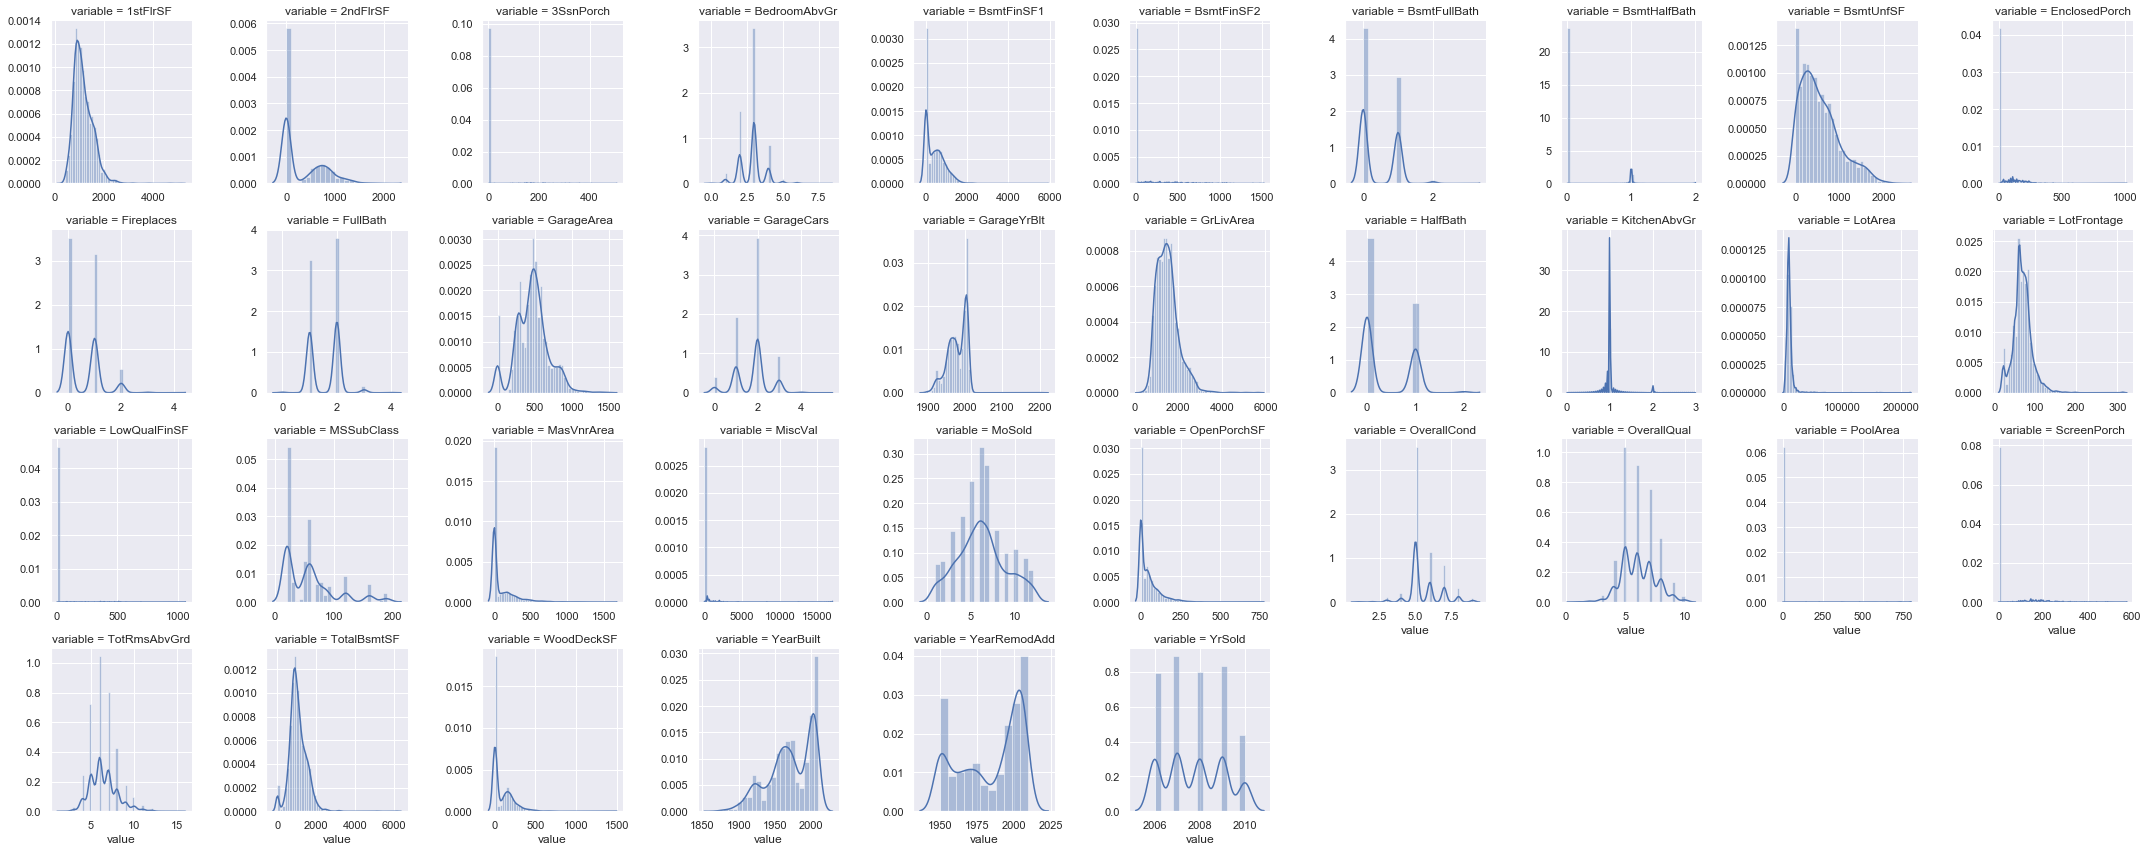

In [11]:
get_facet_grid( full_X, 'numerical' )

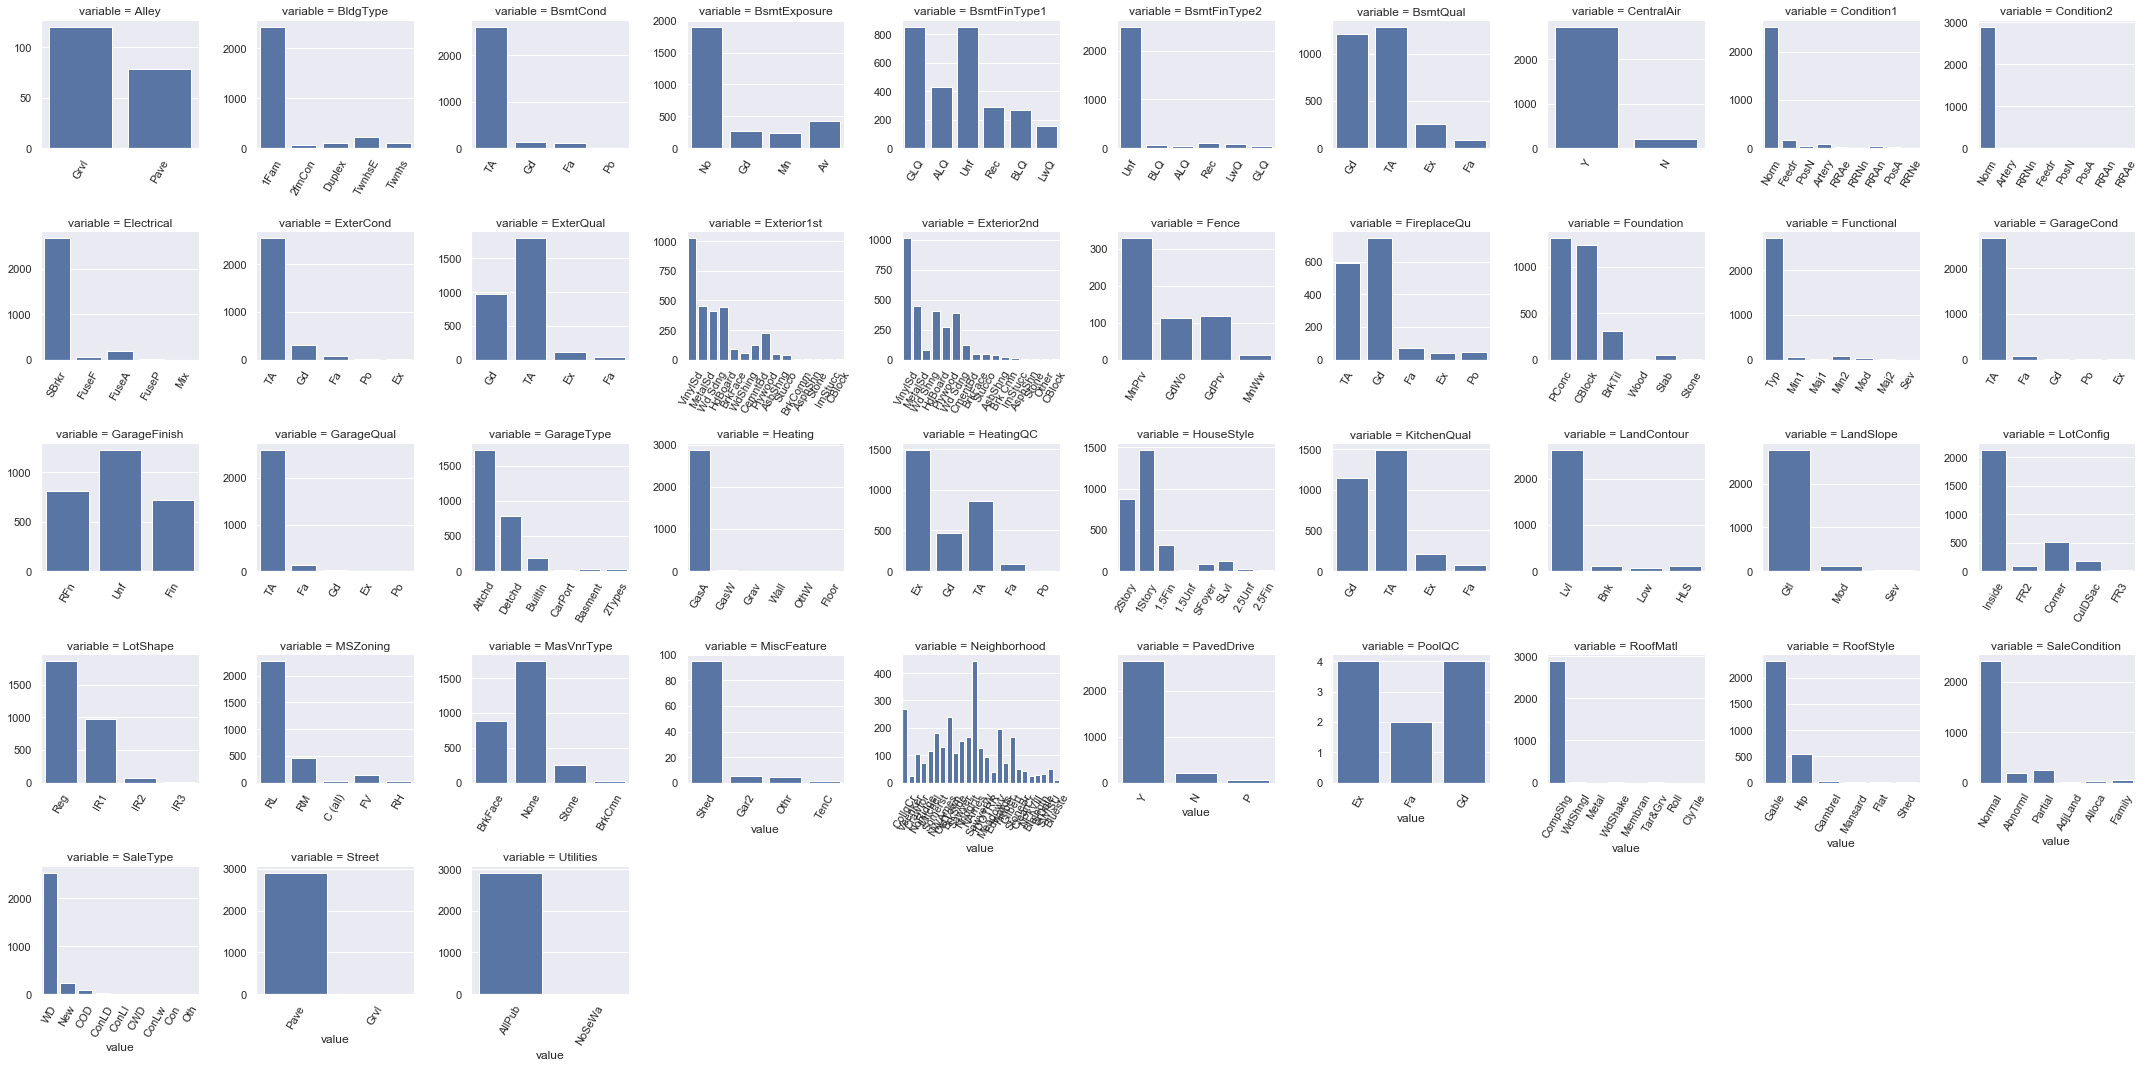

In [12]:
get_facet_grid( full_X, 'categorical' )

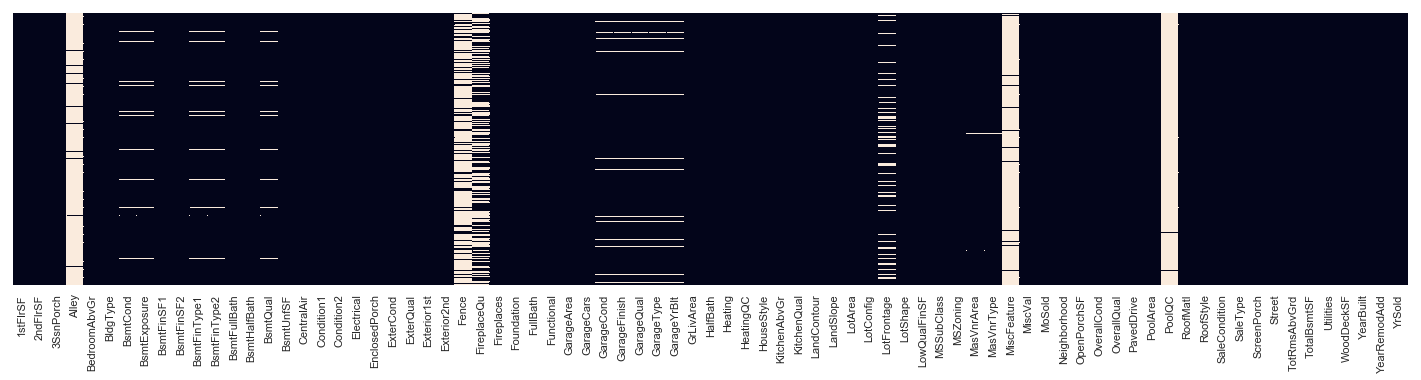

In [13]:
na_heatmap( train_X )

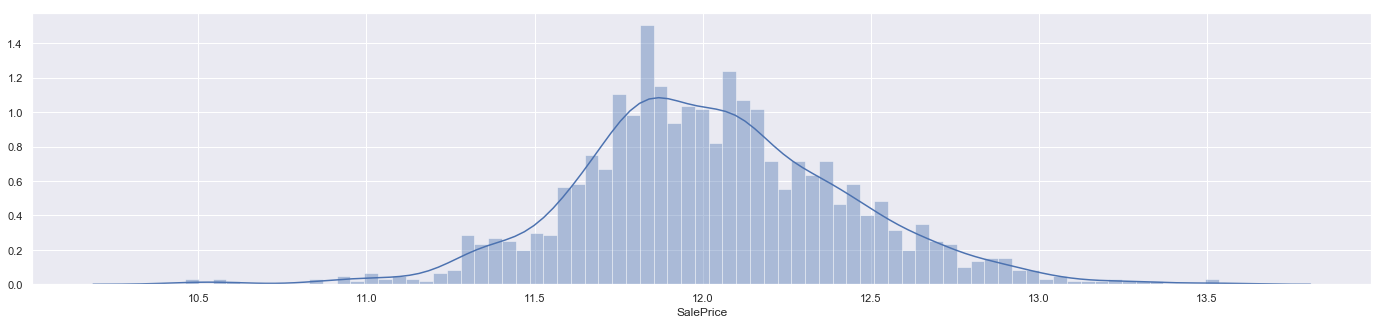

In [14]:
train_y = np.log1p( train_y )
sns.distplot( train_y, bins = 75 )

#### Data Preprocessing

###### Make Ranked Features

In [15]:
# Ranking from Kaggle data info
def convert_to_ranked( df ):
    df[ 'BsmtCond'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4 }, inplace = True )
    df[ 'BsmtExposure' ].replace( { 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4 }, inplace = True )
    df[ 'BsmtFinType1' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtFinType2' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtQual'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterCond'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterQual'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'Fence'        ].replace( { 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4 }, inplace = True )
    df[ 'FireplaceQu'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'Functional'   ].replace( { 'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8 }, inplace = True )
    df[ 'GarageCond'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'GarageFinish' ].replace( { 'Unf' : 1, 'RFn' : 2, 'Fin' : 3 }, inplace = True )
    df[ 'GarageQual'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'HeatingQC'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'KitchenQual'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'LandSlope'    ].replace( { 'Sev' : 1, 'Mod' : 2, 'Gtl' : 3 }, inplace = True )
    df[ 'LandContour'  ].replace( { 'Low' : 1, 'HLS' : 2, 'Bnk' : 3, 'Lvl' : 4 }, inplace = True )
    df[ 'LotShape'     ].replace( { 'Reg' : 1, 'IR1' : 2, 'IR2' : 3, 'IR3' : 4 }, inplace = True )
    df[ 'PoolQC'       ].replace( { 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'Utilities'    ].replace( { 'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4 }, inplace = True )

In [16]:
convert_to_ranked( full_X )

###### Create Features

In [17]:
full_X[ 'TotalSFArea' ] = ( full_X[ '1stFlrSF' ] + full_X[ '2ndFlrSF' ] + full_X[ 'BsmtFinSF1' ] + 
                            full_X[ 'BsmtFinSF2' ] + full_X[ 'BsmtUnfSF' ] + full_X[ 'GarageArea' ] + full_X[ 'GrLivArea' ] )

In [18]:
full_X[ 'TotalBath' ] = ( full_X[ 'BsmtFullBath' ] + full_X[ 'BsmtHalfBath' ] + full_X[ 'FullBath' ] + full_X[ 'HalfBath' ] )

In [19]:
full_X[ 'Has2ndFl' ]  = full_X[ '2ndFlrSF' ] > 0
full_X[ 'HasBsmt' ]   = ( full_X[ 'BsmtFinSF1' ] + full_X[ 'BsmtFinSF2' ] + full_X[ 'BsmtUnfSF' ] ) > 0
full_X[ 'HasGarage' ] = full_X[ 'GarageArea' ] > 0

###### Make Categorical

In [20]:
def convert_to_category( df ):
    df[ 'MSSubClass' ].replace( { 20 : '20', 30 : '30', 40 : '40', 45 : '45', 50 : '50', 60 : '60',
                                  70 : '70', 75 : '75', 80 : '80', 85 : '85', 90 : '90', 120 : '120',
                                  150 : '150', 160 : '160', 180 : '180', 190 : '190' }, inplace = True )
    df[ 'MoSold' ].replace( { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 
                              7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' }, inplace = True )
    df[ 'YrSold' ].replace( { 2006 : '2006', 2007 : '2007', 2008 : '2008', 2009 : '2009', 2010 : '2010'  }, inplace = True )

In [21]:
convert_to_category( full_X )

###### Replace Missing Values

In [22]:
full_X[ ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 
        'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Utilities'] ] = \
full_X[ ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Fence', 'FireplaceQu', 
        'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'MasVnrType', 'MiscFeature', 'PoolQC', 'Utilities'] ].fillna( value = 'None' )

In [23]:
full_X[ ['GarageYrBlt', 'LotFrontage', 'MasVnrArea'] ] = full_X[ ['GarageYrBlt', 'LotFrontage', 'MasVnrArea'] ].fillna( value = 0 )

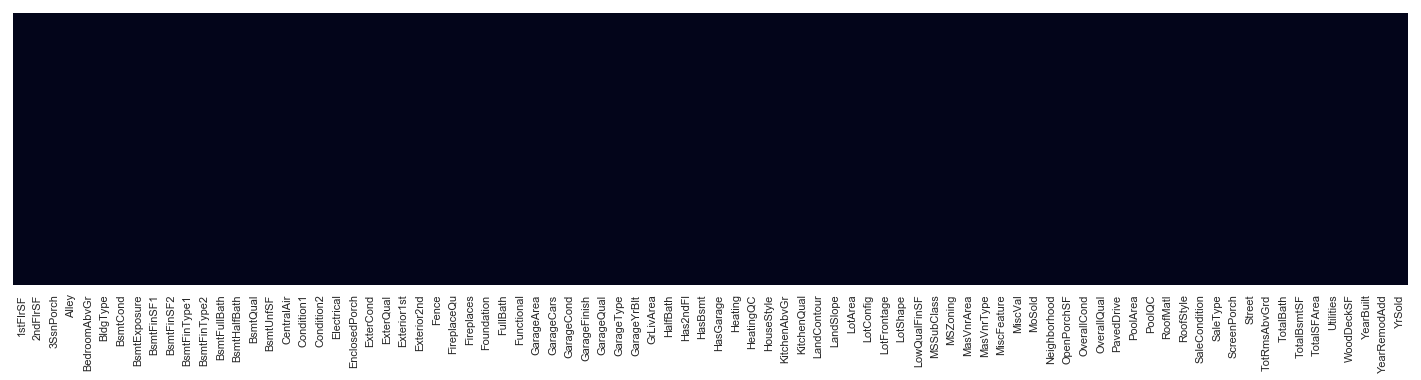

In [24]:
na_heatmap( full_X )

In [25]:
still_missing = pd.DataFrame( len( full_X[ get_categorical_features ] ) - full_X[ get_categorical_features ].count() )
still_missing[ still_missing[ 0 ] > 0 ]

,0
MSZoning,4
Exterior1st,1
Exterior2nd,1
Electrical,1
SaleType,1


In [26]:
full_X[ ['MSZoning', 'Exterior1st', 'Exterior2nd', 'Electrical', 'SaleType'] ] = full_X[ ['MSZoning', 'Exterior1st', 'Exterior2nd', 'Electrical', 'SaleType'] ].fillna( full_X.mode().iloc[0] )

###### Fix Skew

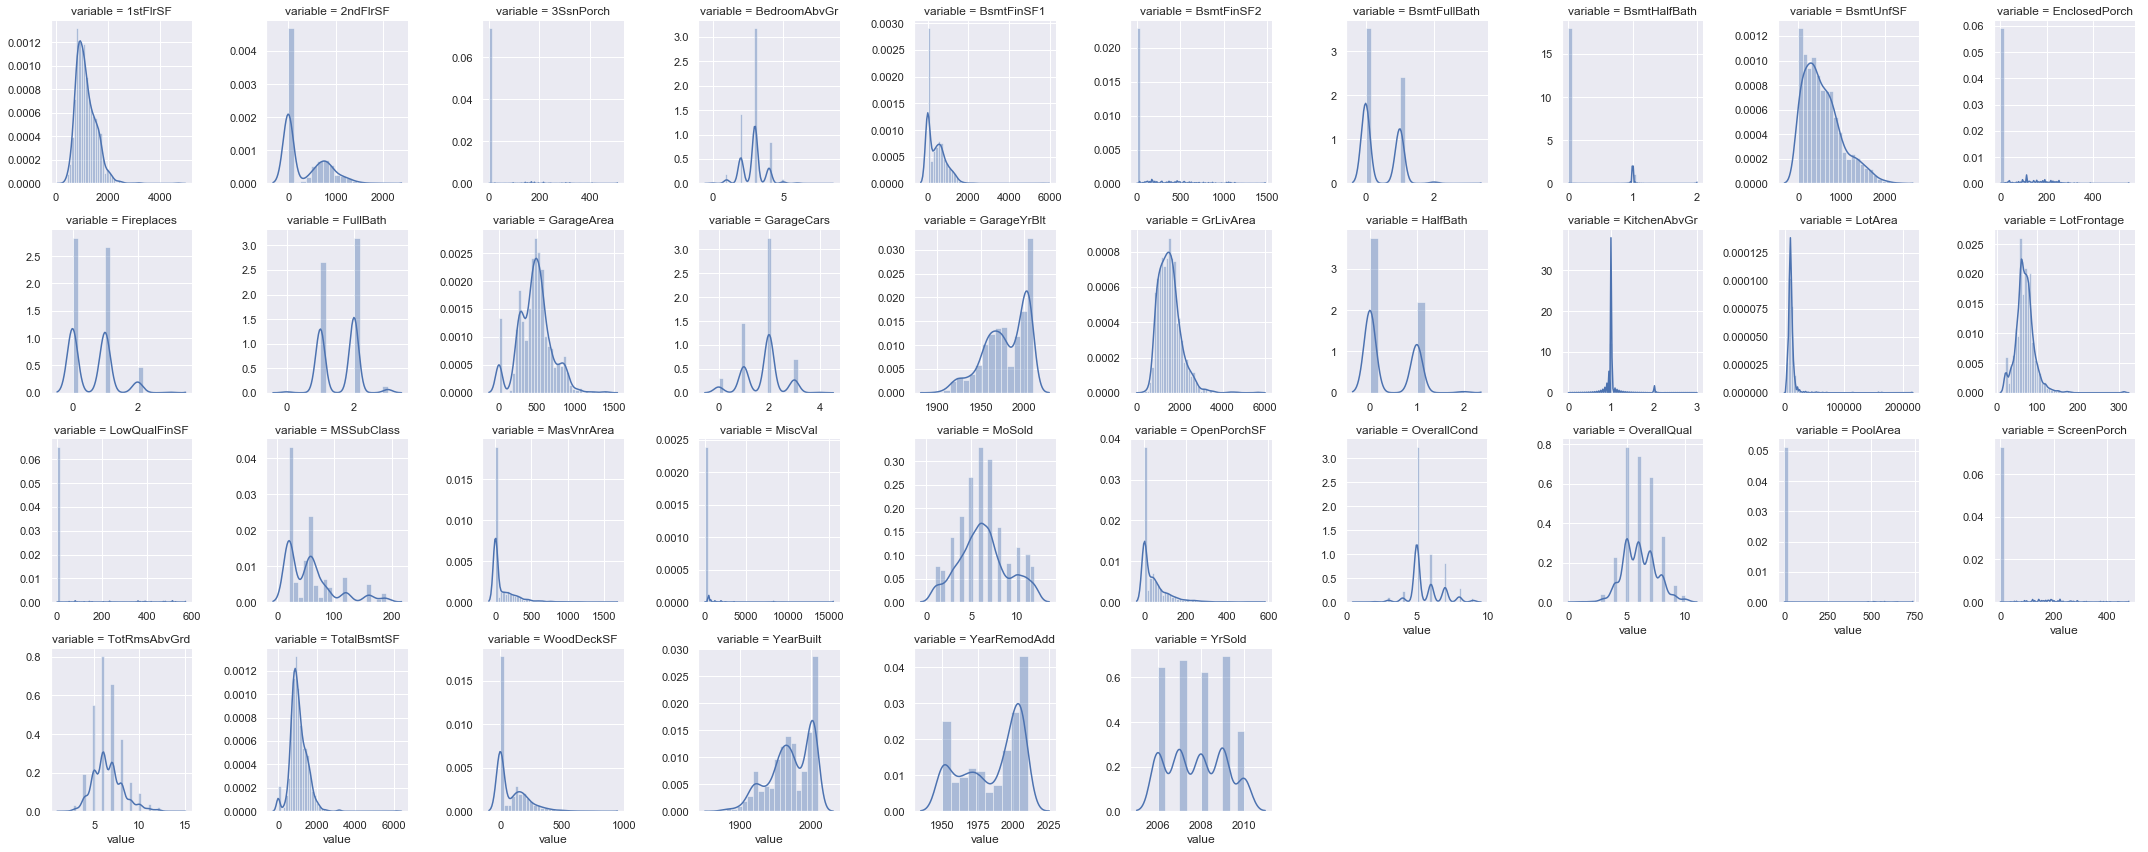

In [27]:
get_facet_grid( train_X, 'numerical' )

In [28]:
def fix_pos_skew( df ):
    return np.log1p( full_X[ df ] + 1 )

In [29]:
features_to_log = [ '1stFlrSF', 'GrLivArea', 'LotArea', 'OpenPorchSF', 'TotalSFArea', 'WoodDeckSF' ]

In [30]:
for feature in features_to_log:
    full_X[ feature ] = fix_pos_skew( feature )

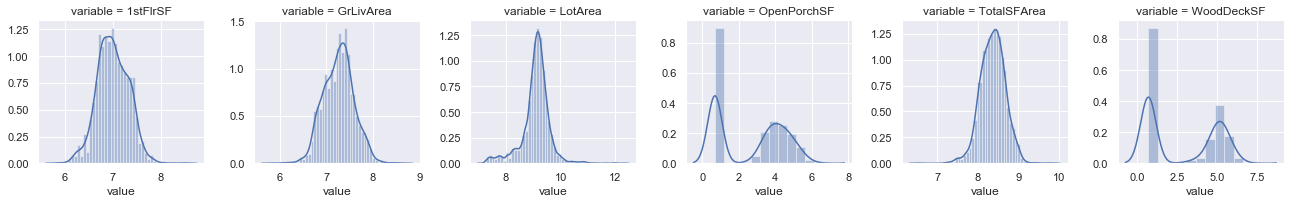

In [32]:
get_facet_grid( full_X[ features_to_log ], 'numerical' )

###### Handle Incorrect Data Input (Test Garage Year Built)

In [33]:
print( max( full_X[ 'GarageYrBlt' ] ) )
print( sorted( full_X[ 'GarageYrBlt' ], reverse = True )[ 0:5 ] )

2207.0
[2207.0, 2010.0, 2010.0, 2010.0, 2010.0]


In [34]:
full_X = full_X[ full_X[ 'GarageYrBlt' ] != 2207.0 ]

###### Create One-Hot-Encoded

In [35]:
full_X = pd.get_dummies( full_X )

###### Split Back to Train/Test

In [36]:
train_X = full_X[ 0:train_end ]
test_X  = full_X[ train_end:test_end ]

print( "Train: {} \nTest: {}".format( train_X.shape, test_X.shape ) )

Train: (1460, 310) 
Test: (1458, 310)


#### Standardize Features

In [38]:
scaler  = MinMaxScaler()

train_X = pd.DataFrame( scaler.fit_transform( train_X, train_y ) )
test_X  = pd.DataFrame( scaler.transform( test_X ) )

train_X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309
0,0.207668,0.366199,0.000000,1.0,1.0,0.666667,0.500,0.949275,0.883333,0.12250,0.666667,0.5,0.125089,0.0,0.064212,0.140098,1.00,0.355524,0.413559,0.0,0.577160,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.996517,0.50,0.386460,0.000000,0.614429,0.000000,0.0,0.0,0.0,0.0,0.592039,0.6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.255591,0.391174,0.000000,1.0,1.0,0.555556,0.875,0.753623,0.433333,0.00000,0.333333,0.5,0.173281,0.0,0.121575,0.206547,1.00,0.502450,0.000000,0.0,0.469626,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.983085,0.50,0.324401,0.826480,0.000000,0.000000,0.0,0.0,0.0,0.0,0.553788,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.217252,0.422219,0.333333,1.0,1.0,0.666667,0.500,0.934783,0.866667,0.10125,0.666667,0.5,0.086109,0.0,0.185788,0.

#### Build & Compare Models